In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=np.loadtxt('data.txt')
p_data=data[:50,:2]
n_data=data[50:,:2]

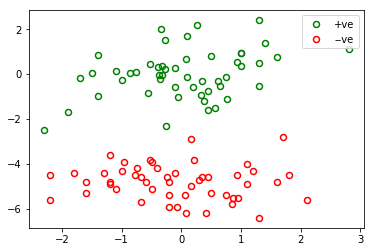

In [3]:
plt.plot(p_data[:,0], p_data[:,1], 'go', markerfacecolor='none', markeredgewidth=1.5, label='+ve')
plt.plot(n_data[:,0], n_data[:,1], 'ro', mfc='none', mew=1.5, label='--ve')
plt.legend()
plt.show()

In [4]:
alpha=np.arange(0.1,1,0.1)

np.random.seed(5)
init_theta=np.random.uniform(-0.01,0.01,3)

x1=data[:,0]
x2=data[:,1]
y=data[:,2]

min_err=10000000
error=np.empty(100)
print('Intial theta', init_theta)

Intial theta [-0.00556014  0.00741465 -0.00586562]


In [5]:
# theta=init_theta
for a in alpha:
    theta=init_theta
    for i in range(100):
        z=theta[0] + theta[1]*x1 + theta[2]*x2
        gx=1/(1 + np.exp(-z))
        theta=theta + np.dot(a*(y-gx),np.array([[1]*len(y), x1, x2]).T)
        if a==0.9:
            error[i]=np.sum(np.square(gx-y))/2
    err=np.sum(np.square(gx-y))
    print('Error with learning rate {} is {} '.format(a, err))
    if err<min_err:
        min_err=err
        best_alpha=a
        best_theta=theta

Error with learning rate 0.1 is 0.0947014269670394 
Error with learning rate 0.2 is 0.015313712400326002 
Error with learning rate 0.30000000000000004 is 0.0017234049233768522 
Error with learning rate 0.4 is 0.00017325131349937902 
Error with learning rate 0.5 is 2.1494779911236458e-05 
Error with learning rate 0.6 is 8.44934199687302e-06 
Error with learning rate 0.7000000000000001 is 5.814264112966357e-06 
Error with learning rate 0.8 is 4.4021131906287606e-06 
Error with learning rate 0.9 is 3.4554465329760803e-06 


In [6]:
print('min_err: ',min_err)
print('best_theta: ',best_theta)
print('best_alpha: ',best_alpha)

min_err:  3.4554465329760803e-06
best_theta:  [ 69.17555895 -11.20069826  28.60486373]
best_alpha:  0.9


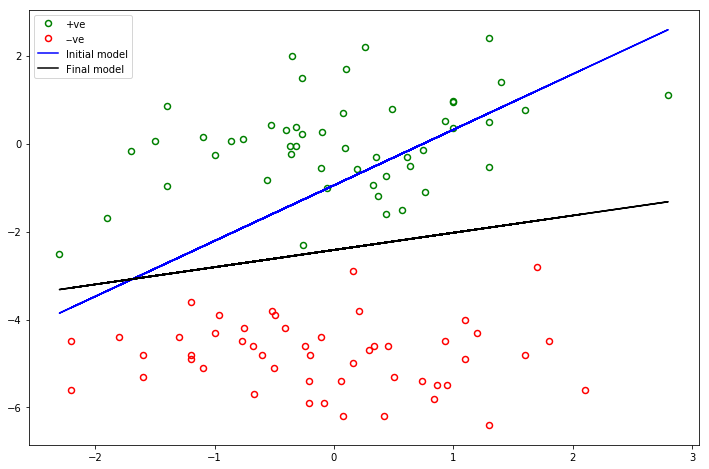

In [7]:
init_x2=(init_theta[0] + init_theta[1]*x1)*(-1/init_theta[2])
predicted_x2=(best_theta[0] + best_theta[1]*x1)*(-1/best_theta[2])
plt.figure(figsize=(12, 8))
plt.plot(p_data[:,0], p_data[:,1], 'go', markerfacecolor='none', markeredgewidth=1.5, label='+ve')
plt.plot(n_data[:,0], n_data[:,1], 'ro', mfc='none', mew=1.5, label='--ve')
plt.plot(data[:,0], init_x2, 'b', label='Initial model')
plt.plot(data[:,0], predicted_x2, 'black', label='Final model')
plt.legend()
plt.show()

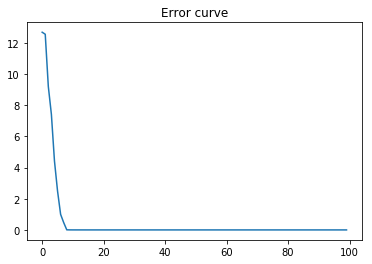

In [8]:
plt.plot(error)
plt.title('Error curve')
plt.show()